In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

In [2]:
diskop_df = pd.read_csv("/content/Dinas Koperasi UMKM.csv")
print(diskop_df.shape)
print(diskop_df)

(9, 5)
                                        Uraian Satuan  2022  2023  2024
0                   Jumlah UMKM Bidang Kuliner  Usaha  2936  2748  2748
1                   Jumlah UMKM Bidang Fashion  Usaha   998   218   218
2                Jumlah UMKM Bidang Pendidikan  Usaha     0     2     2
3                  Jumlah UMKM Bidang Otomotif  Usaha   389   351   351
4                Jumlah UMKM Bidang Agrobisnis  Usaha   250   599   599
5        Jumlah UMKM Bidang Teknologi Internet  Usaha   313     6     6
6                   Jumlah UMKM Bidang Lainnya  Usaha  1226     4     4
7  Jumlah Koperasi Aktif Simpan Pinjam Mandiri   Unit    57    57    57
8    Jumlah Koperasi Aktif Serba Usaha Mandiri   Unit    60    61    61


**Assessing Data**

In [3]:
# Menampilkan informasi pada dataset
diskop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Uraian  9 non-null      object
 1   Satuan  9 non-null      object
 2   2022    9 non-null      int64 
 3   2023    9 non-null      int64 
 4   2024    9 non-null      int64 
dtypes: int64(3), object(2)
memory usage: 492.0+ bytes


In [4]:
# Memeriksa missing value
diskop_df.isna().sum()

,0
Uraian,0
Satuan,0
2022,0
2023,0
2024,0


In [5]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", diskop_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [6]:
# Mengubah semua nama kolom menjadi string
diskop_df.columns = diskop_df.columns.map(str)
print(diskop_df)

                                        Uraian Satuan  2022  2023  2024
0                   Jumlah UMKM Bidang Kuliner  Usaha  2936  2748  2748
1                   Jumlah UMKM Bidang Fashion  Usaha   998   218   218
2                Jumlah UMKM Bidang Pendidikan  Usaha     0     2     2
3                  Jumlah UMKM Bidang Otomotif  Usaha   389   351   351
4                Jumlah UMKM Bidang Agrobisnis  Usaha   250   599   599
5        Jumlah UMKM Bidang Teknologi Internet  Usaha   313     6     6
6                   Jumlah UMKM Bidang Lainnya  Usaha  1226     4     4
7  Jumlah Koperasi Aktif Simpan Pinjam Mandiri   Unit    57    57    57
8    Jumlah Koperasi Aktif Serba Usaha Mandiri   Unit    60    61    61


In [7]:
# Save data clean
diskop_df.to_csv('diskop_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [8]:
# Statistik deskriptif numerik
diskop_df.describe()

,2022,2023,2024
count,9.000000,9.000000,9.000000
mean,692.111111,449.555556,449.555556
std,943.838896,885.236848,885.236848
min,0.000000,2.000000,2.000000
25%,60.000000,6.000000,6.000000
50%,313.000000,61.000000,61.000000
75%,998.000000,351.000000,351.000000
max,2936.000000,2748.000000,2748.000000


In [9]:
# Cek distribusi tiap kolom kategorikal
for col in diskop_df.select_dtypes(include='object').columns:
    print(f"\nDistribusi kategori pada kolom {col}:")
    print(diskop_df[col].value_counts())



Distribusi kategori pada kolom Uraian:
Uraian
Jumlah UMKM Bidang Kuliner                     1
Jumlah UMKM Bidang Fashion                     1
Jumlah UMKM Bidang Pendidikan                  1
Jumlah UMKM Bidang Otomotif                    1
Jumlah UMKM Bidang Agrobisnis                  1
Jumlah UMKM Bidang Teknologi Internet          1
Jumlah UMKM Bidang Lainnya                     1
Jumlah Koperasi Aktif Simpan Pinjam Mandiri    1
Jumlah Koperasi Aktif Serba Usaha Mandiri      1
Name: count, dtype: int64

Distribusi kategori pada kolom Satuan:
Satuan
Usaha    7
Unit     2
Name: count, dtype: int64


In [19]:
# Melihat Jumlah UMKM Semua Bidang Tahun 2024
umkm_mask = diskop_df['Uraian'].str.contains("UMKM", case=False)
umkm_data = diskop_df[umkm_mask][['Uraian', '2024']].copy()
umkm_data['Bidang Usaha'] = umkm_data['Uraian'].str.replace('Jumlah UMKM Bidang ', '', regex=False)

# Tabel UMKM dan totalnya
umkm_table = umkm_data[['Bidang Usaha', '2024']].rename(columns={'2024': 'Jumlah'})

# Tambahkan total di baris akhir
total_row = pd.DataFrame({
    'Bidang Usaha': ['Total'],
    'Jumlah': [umkm_table['Jumlah'].sum()]
})

# Gabungkan tabel dengan total
umkm_table = pd.concat([umkm_table, total_row], ignore_index=True)

# Cetak tabel
print("Jumlah UMKM Kota Lubuk Linggau Tahun 2024:")
print(umkm_table)


Jumlah UMKM Kota Lubuk Linggau Tahun 2024:
         Bidang Usaha  Jumlah
0             Kuliner    2748
1             Fashion     218
2          Pendidikan       2
3            Otomotif     351
4          Agrobisnis     599
5  Teknologi Internet       6
6             Lainnya       4
7               Total    3928


In [22]:
# Melihat koperasi aktif simpan pinjam mandiri tahun 2022-2024
simpan_aktif = diskop_df[
    diskop_df['Uraian'].str.contains("koperasi aktif simpan pinjam", case=False) &
    diskop_df['Uraian'].str.contains("mandiri", case=False)
][['Uraian', '2022', '2023', '2024']]

# Ganti nama kolom untuk kejelasan
simpan_aktif = simpan_aktif.rename(columns={
    '2022': '2022',
    '2023': '2023',
    '2024': '2024'
})

# Tampilkan tabel
print("\nJumlah Koperasi Aktif Simpan Pinjam Mandiri:")
print(simpan_aktif)



Jumlah Koperasi Aktif Simpan Pinjam Mandiri:
                                        Uraian  2022  2023  2024
7  Jumlah Koperasi Aktif Simpan Pinjam Mandiri    57    57    57


In [24]:
# Melihat koperasi aktif serba usaha mandiri tahun 2022-2024
serba_aktif = diskop_df[
    diskop_df['Uraian'].str.contains("koperasi aktif serba usaha", case=False) &
    diskop_df['Uraian'].str.contains("mandiri", case=False)
][['Uraian', '2022', '2023', '2024']]

# Ganti nama kolom untuk kejelasan
serba_aktif = serba_aktif.rename(columns={
    '2022': '2022',
    '2023': '2023',
    '2024': '2024'
})

# Tampilkan tabel
print("\nJumlah Koperasi Aktif Simpan Serba Usaha:")
print(serba_aktif)


Jumlah Koperasi Aktif Simpan Serba Usaha:
                                      Uraian  2022  2023  2024
8  Jumlah Koperasi Aktif Serba Usaha Mandiri    60    61    61


# **Visualization & Explanatory Analysis**

<ipython-input-25-1230058630>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


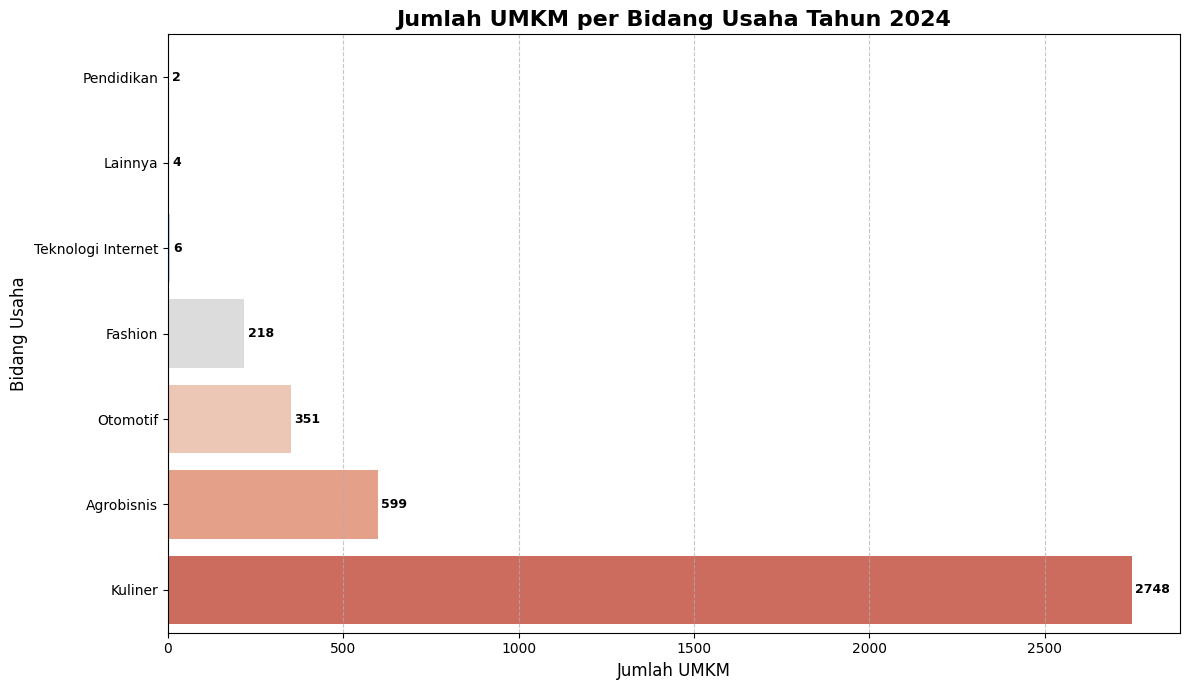

In [25]:
# Jumlah UMKM
# Siapkan data UMKM per bidang usaha tahun 2024
umkm_mask = diskop_df['Uraian'].str.contains("UMKM", case=False)
umkm_data = diskop_df[umkm_mask][['Uraian', '2024']].copy()
umkm_data['Bidang Usaha'] = umkm_data['Uraian'].str.replace('Jumlah UMKM Bidang ', '', regex=False)
umkm_data = umkm_data[['Bidang Usaha', '2024']].rename(columns={'2024': 'Jumlah UMKM (2024)'})
umkm_data = umkm_data.sort_values(by='Jumlah UMKM (2024)', ascending=True)

# Buat diagram horizontal barplot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=umkm_data,
    x='Jumlah UMKM (2024)',
    y='Bidang Usaha',
    palette='coolwarm'
)

# Tambahkan anotasi nilai
for index, value in enumerate(umkm_data['Jumlah UMKM (2024)']):
    plt.text(value + 10, index, str(value), va='center', fontweight='bold', fontsize=9)

# Tampilan akhir
plt.title('Jumlah UMKM per Bidang Usaha Tahun 2024', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah UMKM', fontsize=12)
plt.ylabel('Bidang Usaha', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

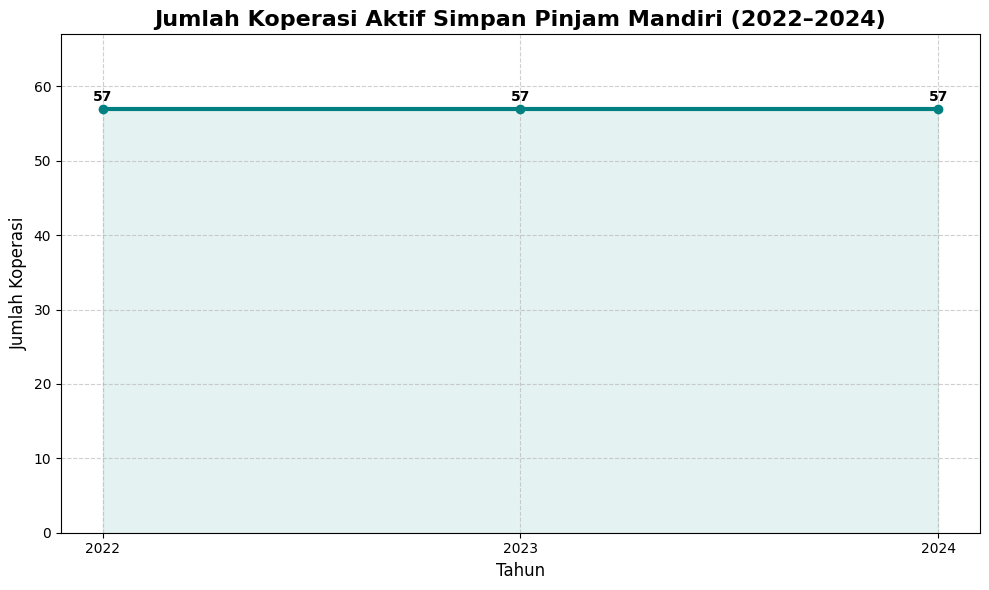

In [26]:
# Data jumlah koperasi aktif simpan pinjam mandiri
tahun = ['2022', '2023', '2024']
jumlah_koperasi = [57, 57, 57]

# Buat figure
plt.figure(figsize=(10, 6))
plt.plot(tahun, jumlah_koperasi, marker='o', linestyle='-', linewidth=3, color='teal')

# Anotasi nilai tiap titik
for i, value in enumerate(jumlah_koperasi):
    plt.text(tahun[i], value + 1, str(value), ha='center', fontsize=10, fontweight='bold')

# Tambahan efek visual
plt.fill_between(tahun, jumlah_koperasi, color='teal', alpha=0.1)
plt.title("Jumlah Koperasi Aktif Simpan Pinjam Mandiri (2022–2024)", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Jumlah Koperasi", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, max(jumlah_koperasi) + 10)
plt.tight_layout()
plt.show()

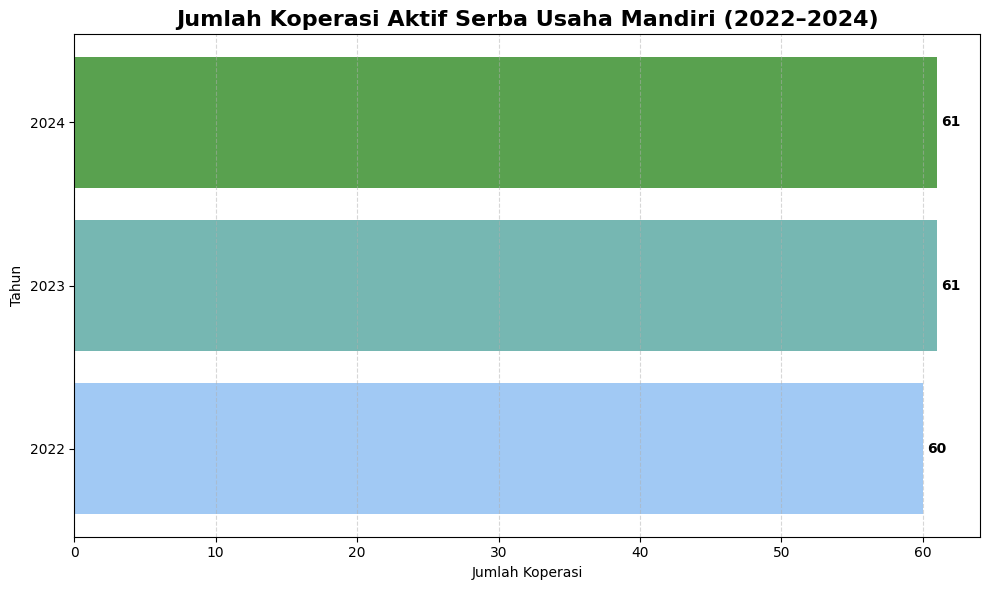

In [27]:
# Data koperasi aktif serba usaha mandiri tahun 2022-2024
tahun = ['2022', '2023', '2024']
jumlah_koperasi = [60, 61, 61]

# Warna gradasi
colors = ['#A1C9F4', '#76B7B2', '#59A14F']

# Buat diagram horizontal bar
plt.figure(figsize=(10, 6))
bars = plt.barh(tahun, jumlah_koperasi, color=colors)

# Anotasi angka di setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             str(int(width)), va='center', fontweight='bold')

# Judul dan dekorasi
plt.title("Jumlah Koperasi Aktif Serba Usaha Mandiri (2022–2024)",
          fontsize=16, fontweight='bold')
plt.xlabel("Jumlah Koperasi")
plt.ylabel("Tahun")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()